# 1.0 Data Importing and exploration

***1.1 read the svc file ***

In [1]:
import pandas as pd

df = pd.read_csv("Student_Performance.csv")

**1.2 Exploration**

In [2]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
#show the dimention of the data
df.shape

(10000, 6)

In [4]:
#dispaly columns
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [5]:
#dispaly datatypes
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
#display descriptive statistics of the numerical columns
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#2.0 Exporatory Analysis

**2.1 Checking for missing values**

In [8]:
# Check for missing values
missing_values = df.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

missing_count

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Note: no missing values

**2.2 Checking for outliers**

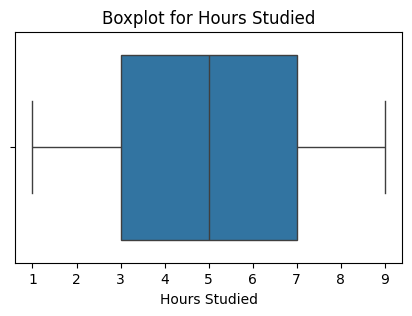

Number of outliers in 'Hours Studied': 0


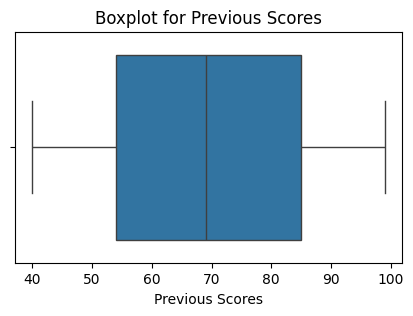

Number of outliers in 'Previous Scores': 0


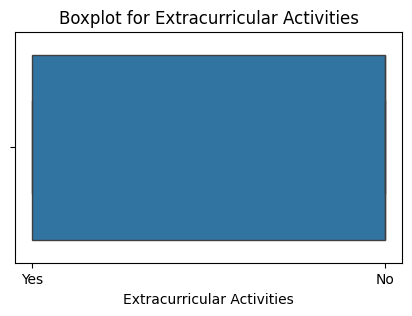

Error processing 'Extracurricular Activities': unsupported operand type(s) for -: 'str' and 'str'


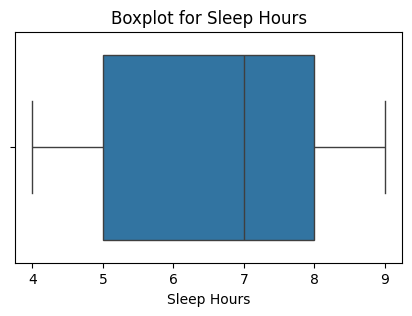

Number of outliers in 'Sleep Hours': 0


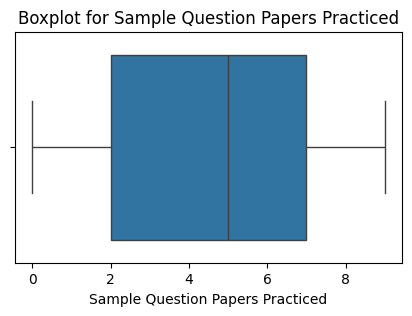

Number of outliers in 'Sample Question Papers Practiced': 0


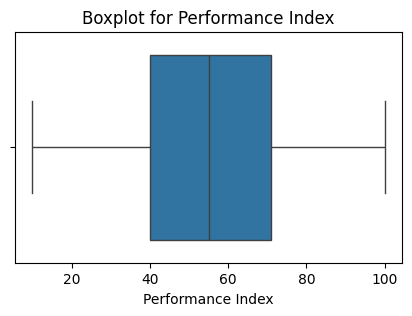

Number of outliers in 'Performance Index': 0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_to_check = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

for column in columns_to_check:
    try:
        plt.figure(figsize=(5, 3))

        # Boxplot
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Count the number of outliers
        num_outliers = outliers.sum()

        print(f"Number of outliers in '{column}': {num_outliers}")

    except Exception as e:
        print(f"Error processing '{column}': {str(e)}")

Note: there is no outliers

**2.3 Univariate analysis**

Univariate analysis involves examining the distribution and characteristics of a single variable.

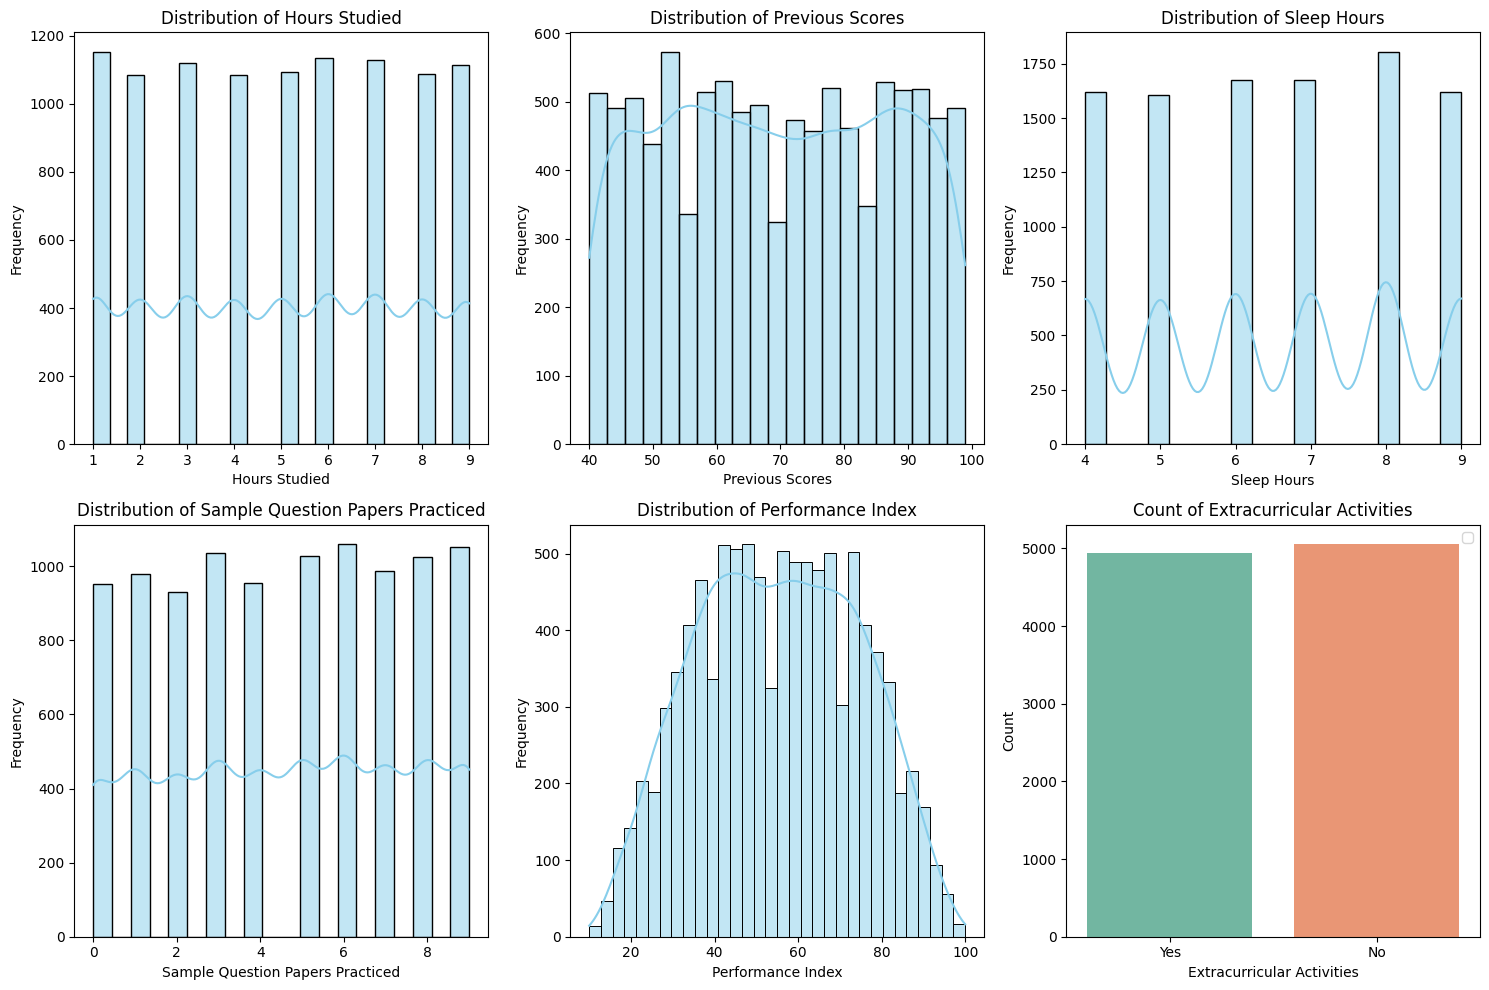

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the figure size
plt.figure(figsize=(15, 10))

# Univariate Analysis for Numeric Features
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced',
                    'Performance Index']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Univariate Analysis for Categorical Features
categorical_features = ['Extracurricular Activities']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i + len(numeric_features))  # Adjust subplot position for categorical features
    sns.countplot(data=df, x=feature, hue='Extracurricular Activities', palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


**2.5 Bivariate analysis**

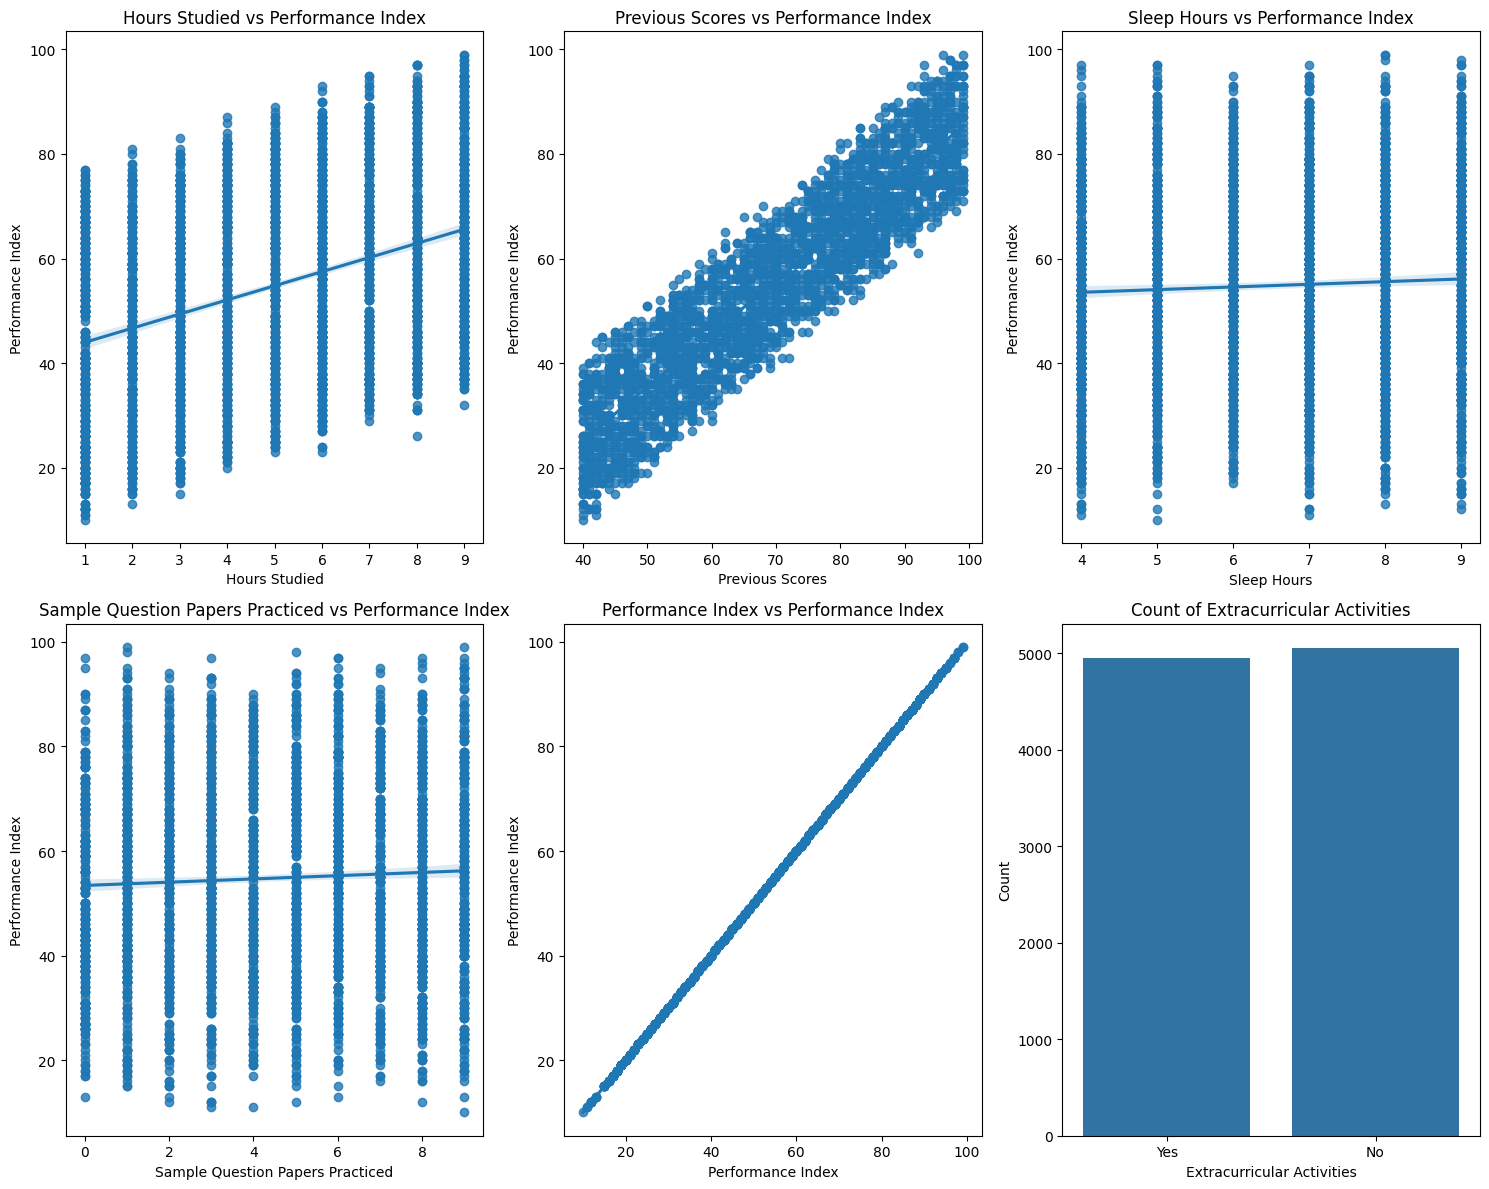

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the figure size
plt.figure(figsize=(15, 12))

# Define the sample size
sample_size_percentage = 30

# Sample the DataFrame
df_sample = df.sample(frac=sample_size_percentage / 100, random_state=42)

# Bivariate Analysis for Numeric Features
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced',
                    'Performance Index']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=feature, y='Performance Index', data=df_sample)
    plt.title(f'{feature} vs Performance Index')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')

# Categorical Analysis
categorical_features = ['Extracurricular Activities']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i + len(numeric_features))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**2.6 Interactive scatter plot on a 5% sample**



In [12]:
import plotly.express as px
import pandas as pd

# Define your sample size (adjust as needed)
sample_size_percentage = 5

# Sample the DataFrame
df_sample = df.sample(frac=sample_size_percentage / 100, random_state=42)

# Define the figure
fig = px.scatter(df_sample, x='Hours Studied', y='Performance Index', title='Interactive Scatter Plot',
                 labels={'Hours Studied': 'Hours Studied', 'Performance Index': 'Performance Index'},
                 hover_data=['Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])

# Show the interactive plot
fig.show()


**2.7 Multi Variate Analysis**

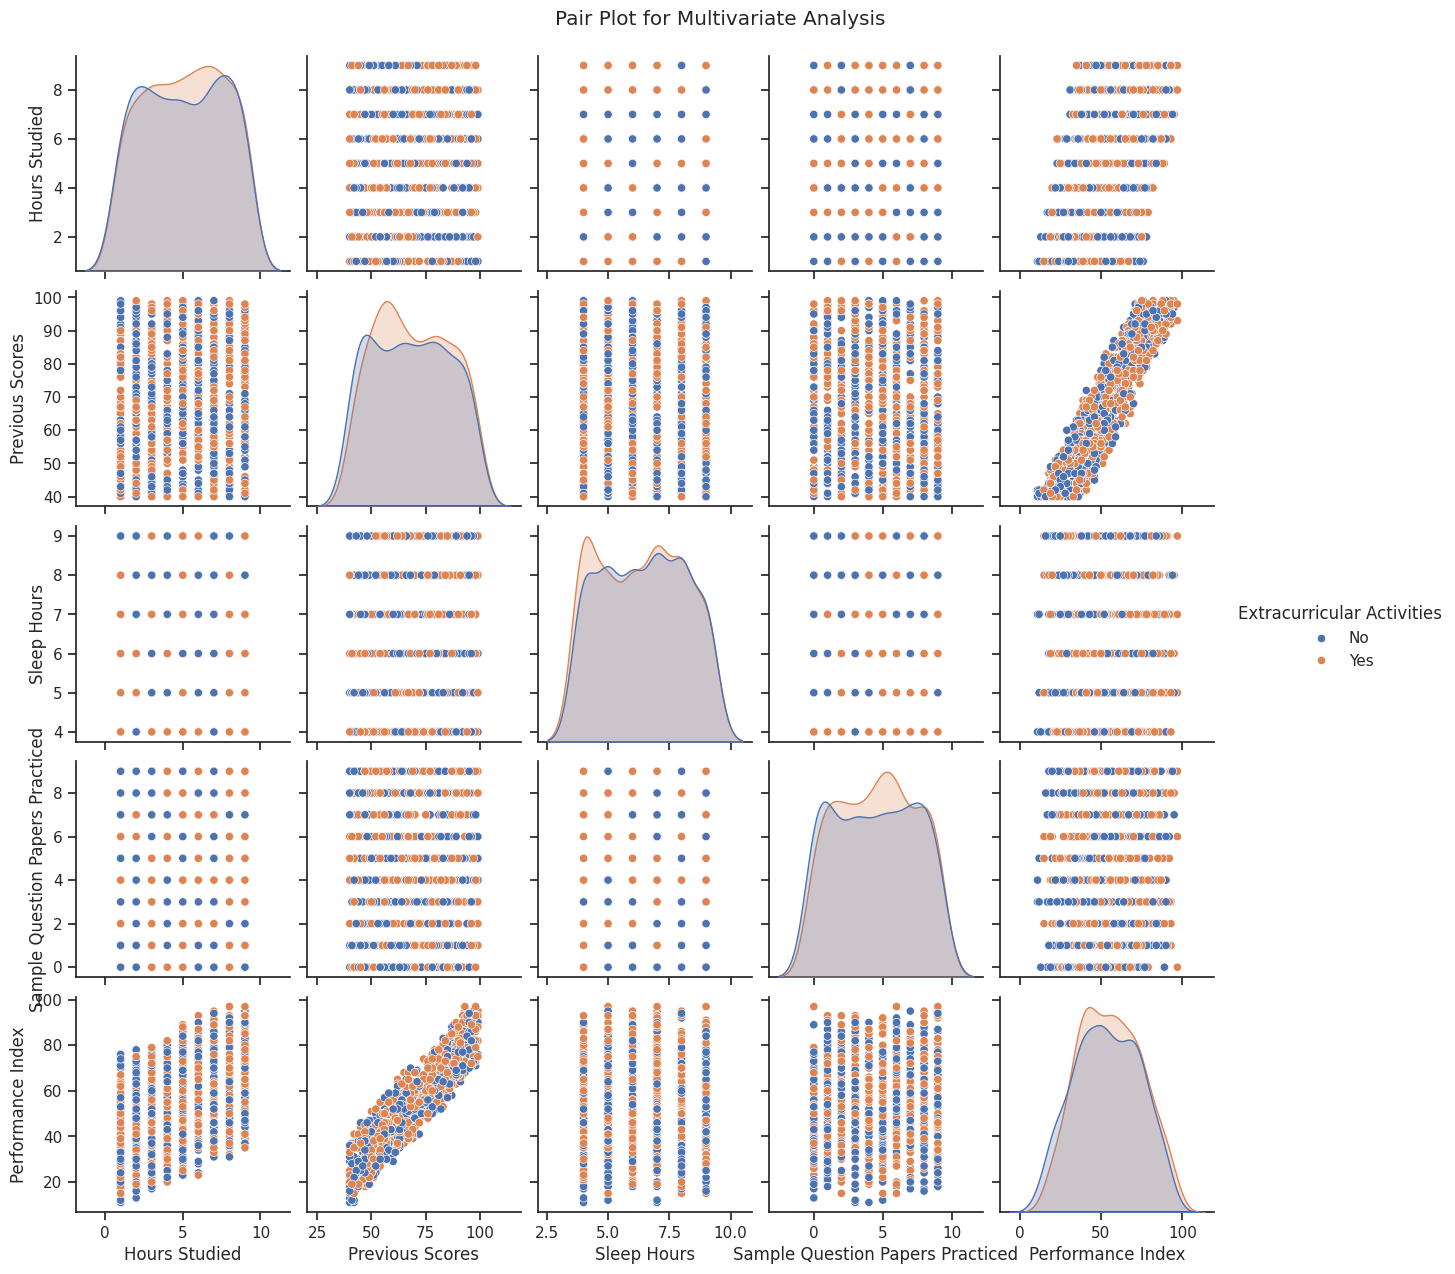

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the sample size
sample_size_percentage = 10

# Sample the DataFrame
df_sample = df.sample(frac=sample_size_percentage / 100, random_state=42)

# Multivariate Analysis (Pair Plot)
sns.set(style="ticks")
sns.pairplot(df_sample, hue="Extracurricular Activities")
plt.suptitle("Pair Plot for Multivariate Analysis", y=1.02)
plt.show()

**2.8 Correlation heatmap**

<ipython-input-14-ad813947a951>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



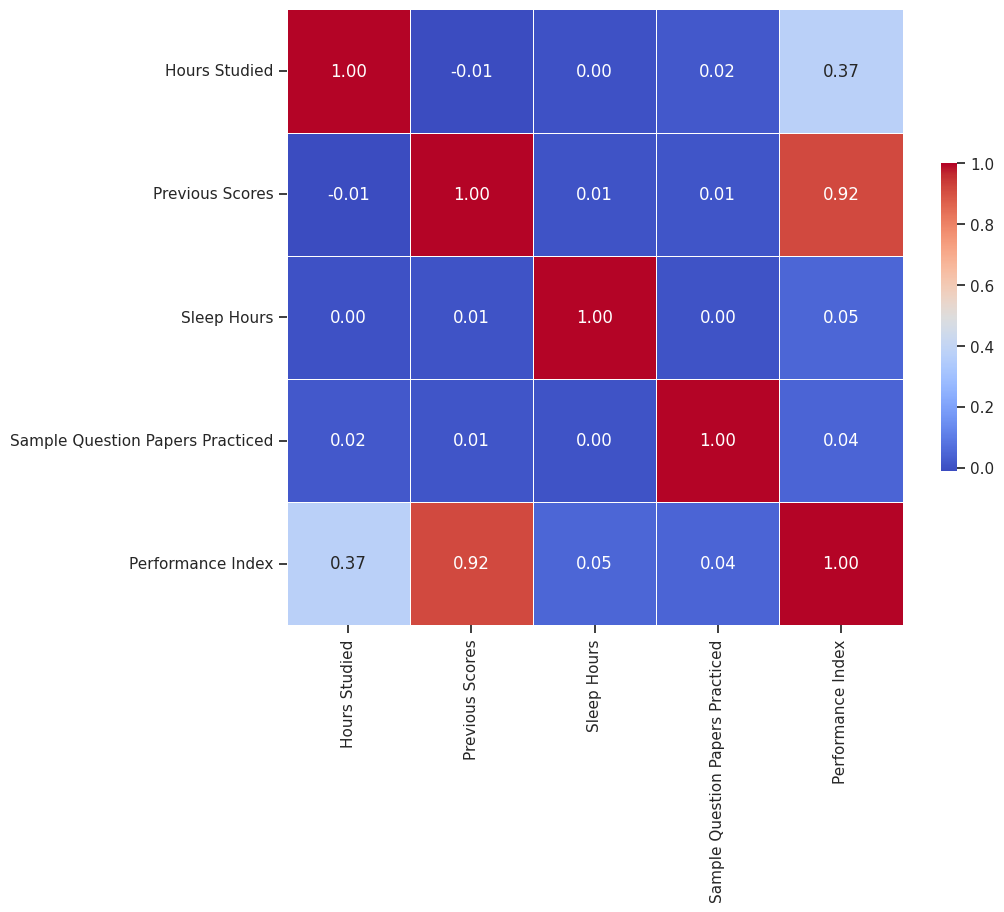

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you have imported it previously.

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


# 3.0 Operation on Data

**3.1 confidence intervals**

We will calculate confidence intervals for the mean of key variables such as the 'Performance Index'.

In statistics, a confidence interval, abbreviated as CI, is a special interval for estimating a certain parameter, such as the population mean.Using confidence intervals in this case is useful for understanding the range within which the true population mean of the 'Performance Index' is likely to lie.

The formula to calculate a confidence interval for the mean is:
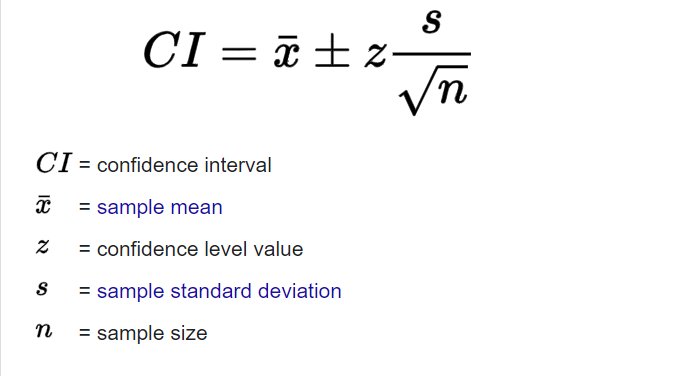

In [15]:
# Calculating the 95% confidence interval for the mean of 'Performance Index'
import numpy as np
import scipy.stats as stats

# Sample mean (x̄) and standard deviation (σ)
mean_performance_index = df['Performance Index'].mean()
std_performance_index = df['Performance Index'].std()

# Sample size (n)
n = len(df['Performance Index'])

# Z-score for 95% confidence
z_score = stats.norm.ppf(0.975)  # Two-tailed test

# Margin of error
margin_of_error = z_score * (std_performance_index / np.sqrt(n))

# Confidence interval
confidence_interval = (mean_performance_index - margin_of_error, mean_performance_index + margin_of_error)
confidence_interval

(54.84824078662158, 55.60135921337842)

**3.2 Ranking and sorting**



> 3.2.1 Ranking by Performance Index








In [16]:
from tabulate import tabulate


sorted_by_performance = df.sort_values(by='Performance Index', ascending=False)

# Displaying the top and bottom 5 students for each criterion
top_bottom_performance = pd.concat([sorted_by_performance.head(5), sorted_by_performance.tail(5)])

# Printing the table
print(tabulate(top_bottom_performance, headers='keys', tablefmt='pretty', showindex=False))

+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
| Hours Studied | Previous Scores | Extracurricular Activities | Sleep Hours | Sample Question Papers Practiced | Performance Index |
+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
|       9       |       99        |            Yes             |      8      |                8                 |       100.0       |
|       9       |       98        |            Yes             |      7      |                7                 |       100.0       |
|       9       |       98        |            Yes             |      4      |                5                 |       100.0       |
|       9       |       96        |            Yes             |      8      |                9                 |       99.0        |
|       8       |       99        |            Yes            



> 3.2.2 Ranking by Hours Studied



In [17]:
from tabulate import tabulate

# Assuming 'Performance Index' is a column in your DataFrame
sorted_by_hours = df.sort_values(by='Hours Studied', ascending=False)

# Displaying the top and bottom 5 students for each criterion
top_bottom_hours_studied = pd.concat([sorted_by_hours.head(5), sorted_by_hours.tail(5)])

# Printing the table
print(tabulate(top_bottom_hours_studied, headers='keys', tablefmt='pretty', showindex=False))

+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
| Hours Studied | Previous Scores | Extracurricular Activities | Sleep Hours | Sample Question Papers Practiced | Performance Index |
+---------------+-----------------+----------------------------+-------------+----------------------------------+-------------------+
|       9       |       68        |             No             |      8      |                2                 |       70.0        |
|       9       |       81        |             No             |      4      |                2                 |       76.0        |
|       9       |       87        |             No             |      4      |                9                 |       83.0        |
|       9       |       78        |             No             |      9      |                3                 |       74.0        |
|       9       |       40        |             No            

fitting the data

**3.3 Cumulative probaility**

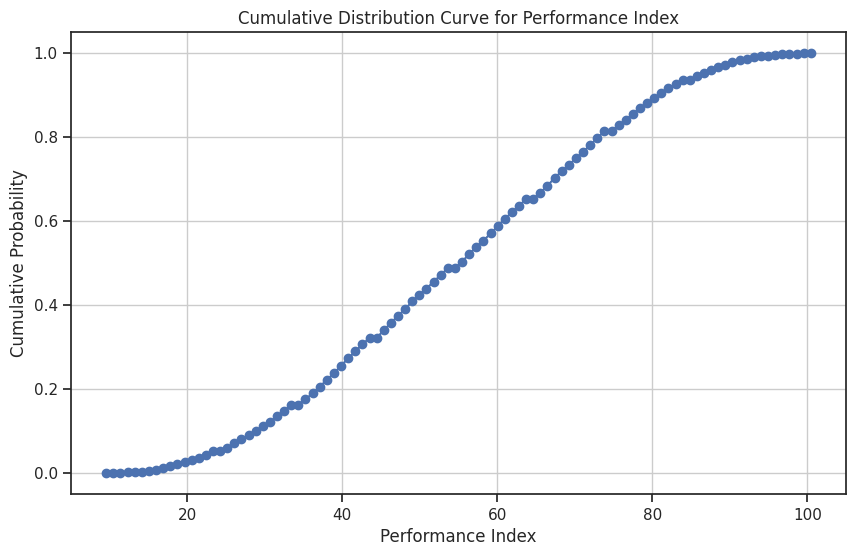

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq
from scipy.stats import percentileofscore

# Assuming 'df' is your DataFrame
performance_index = df['Performance Index'].values

# Calculate cumulative distribution function
cf = cumfreq(performance_index, numbins=100)
cumulative_prob = cf.cumcount / len(performance_index)

# Plot cumulative distribution curve
plt.figure(figsize=(10, 6))
plt.plot(cf.lowerlimit + np.linspace(0, cf.binsize * cf.cumcount.size, cf.cumcount.size), cumulative_prob, '-o')
plt.title('Cumulative Distribution Curve for Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


**3.4 calculating the probability using the z-score and the cumulative distribution function (CDF).**



**Formulas used**

The Z score:

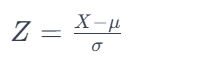




cumulative distribution function (CDF) of the standard normal distribution:


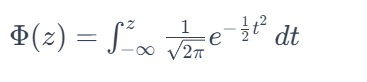



But through using a spicy.stats library that contain a method called norm.cdf that calculate this cdf probability directly.


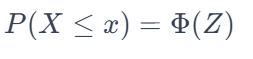




Because we are looking for the probability that is higher we simply substract the probability from 1:


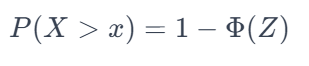

In [ ]:
from scipy.stats import norm

# Assuming 'df' is your DataFrame
mean_performance_index = df['Performance Index'].mean()
std_performance_index = df['Performance Index'].std()

# Get user input for the student's performance index
num = float(input("Enter the student performance index you would like to calculate: "))
performance_index = num

# Calculate the z-score for the performance index
z_score = (performance_index - mean_performance_index) / std_performance_index

# Calculate the probability of scoring higher than the performance index
# Since the normal distribution is symmetrical, we subtract the cumulative distribution function from 1
p_higher = 1 - norm.cdf(z_score)

# Output the probability
print(f"Probability of scoring higher than {performance_index}: {p_higher:.4f}")

# 4.0 Machine learing (Linear regression)

**4.1 Building the model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

# Extract features and target variable
X = df[features]
y = df['Performance Index']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

**4.2 Evaluate the model**

By using:
- Mean Squared Error (MSE):

> The mean squared error is a measure of the average squared difference between the actual and predicted values. It quantifies the overall accuracy of your model. A lower MSE indicates better model performance.



- R-squared (R2):

> R-squared is a measure of how well the model explains the variance in the target variable. It is a normalized metric that ranges from 0 to 1, where 1 indicates a perfect fit. R-squared helps you understand the proportion of the variance in the target variable that is explained by the model.



In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

**4.3 Predict the Performance Index from the inputs**

In [ ]:
new_inputs = pd.DataFrame({
    'Hours Studied': [5],
    'Previous Scores': [99],
    'Sleep Hours': [9],
    'Sample Question Papers Practiced': [5]
})

# Use the model to make predictions
predicted_performance_index = model.predict(new_inputs)

# Display the predicted performance index
print(f'Predicted Performance Index: {predicted_performance_index[0]:.2f}')
